# ДЗ Линейная регрессия

В данном задании мы рассмотрим набор данных об учащихся, собранный в 2006 году в одной из школ Португалии. Данные представлены в неудобном для машинного обучения виде, и содержат мусор. Ваша задача &mdash; привести их к надлежащему виду и обучить на них простую модель.

Данные состоят из четырех файлов:
- data.csv &mdash; основная таблица с информацией о учащихся
- scores.csv &mdash; список финальных оценок по одному из предметов (20-балльная шкала переведенная в проценты)
- attendance.csv &mdash; таблица посещений занятий по этому предмету
- school_support.txt &mdash; список учащихся, которым оказывается финансовая поддержка

Ваша задача &mdash; построить модель для предсказания финальных оценок исходя из всех остальных данных и проверить качество ее работы с помощью кросс-валидации. В качестве алгоритма мы будем использовать линейную регрессию

Расшифровка столбцов в data.csv для справки:
- age &mdash; возраст
- Medu &mdash; уровень образования матери (по некоторой условной шкале)
- Fedu &mdash; уровень образования отца (по некоторой условной шкале)
- traveltime &mdash; время в пути до школы (1 – < 15 мин., 2 – от 15 до 30 мин., 3 – от 30 мин. to 1 ч.
или 4 – > 1 ч.)
- studytime &mdash; время, затрачиваемое на занятия вне школы (1 – < 2 ч., 2 – от 2 до 5 ч., 3 – от 5 до 10 ч. или 4 – > 10 ч.)
- famrel &mdash; насколько хорошие отношения в семье у учащегося (по некоторой условной шкале)
- freetime &mdash; количество свободного времени вне школы (по некоторой условной шкале)
- goout &mdash; время, затрачиваемое на общение с друзьями (по некоторой условной шкале)
- Dalc &mdash; количество употребления алкоголя в учебные дни (по некоторой условной шкале)
- Walc &mdash; количество употребления алкоголя в неучебные дни (по некоторой условной шкале)
- health &mdash; уровень здоровья (по некоторой условной шкале)
- sex_M &mdash; пол: мужской (1) или женский (0)
- address_U &mdash; живет ли учащийся в городе (1) или в пригороде (0)
- famsize_LE3 &mdash; размер семьи: не больше 3 человек (1) или больше (0)
- Pstatus_T &mdash; живут ли родители вместе (1) или отдельно (0)
- nursery &mdash; посещал ли учащийся детский сад
- plans_university &mdash; планирует ли учащийся поступать в университет (-1 или 1)
- past_failures &mdash; количество неудовлетворительных оценок по другим предметам ранее (от 0 до 4)

*Примечание. Несколько признаков в данных содержат ошибки/проблемы/некорректности. Эти проблемы нужно исправить. Для
проверки &mdash; всего в данных таких проблем четыре.*

### Задача 1: сломанный признак (а может и не один)
__(1 балл)__

Загрузите таблицу data.csv.

Найдите в данных сломанный признак (он не соответствует описанию) и исправьте его.

In [2]:
# последние 2 столбца соединены

def sign(n):
    if n < 0:
        return -1
    if n > 0:
        return 1
    return 0

import pandas as pd
data = pd.read_csv('data.csv')

for i in range(len(data["plans_universitypast_failures"])):
    data.at[i, "plans_university"] = sign(data.at[i, "plans_universitypast_failures"])
    data.at[i, "past_failures"] = abs(data.at[i, "plans_universitypast_failures"]) % 10

data["plans_university"] = data["plans_university"].astype(int)
data["past_failures"] = data["past_failures"].astype(int)

data = data.drop("plans_universitypast_failures", axis=1)

data.to_csv("ndata.csv", index=False)

### Задача 2: пропуски в данных 
__(1 балл)__

Проверьте, есть ли в данных пропуски (значения NaN). Замените все пропущенные значения на среднее значение этого признака по столбцу.

*Hint: изучите в pandas функции loc, isnull, а также передачу булевых массивов в качестве индексов.*

In [3]:
for i in data.columns:
    data[i] = data[i].fillna(data[i].mean())

data.to_csv("ndata.csv", index=False)

### Задача 3: нормализация данных
__(1 балл)__

Нормализуйте данные любым способом

In [4]:
def normalization(data_frame):
    new_data = data_frame.copy()
    for i in new_data.columns:
        mn = new_data[i].min()
        mx = new_data[i].max()
        new_data[i] = (new_data[i] - mn) / (mx - mn)
    return new_data

norm_data1 = normalization(data)

norm_data1.to_csv("norm_data1.csv", index=False)

### Задача 4: кросс-валидация для исходных данных
__(1 балл)__

Загрузите файл scores.csv и протестируйте, как линейная регрессия предсказывает ответ сейчас (с помощью кросс-валидации).

Кроссвалидацию сделайте по 4 разбивкам. Выведите качество в каждом их разбиений.

*Hint: воспользуйтесь sklearn.linear_model и sklearn.model_selection.*

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

scores = pd.read_csv('scores.csv', header=None)

def cross_validation(X, Y):
    model = make_pipeline(StandardScaler(), LinearRegression())
    kfold = KFold(n_splits=4, shuffle=True, random_state=52)
    scores_cv = cross_val_score(model, X, Y, cv=kfold, scoring='r2')
    print("R² по фолдам:", [f'{x:.3f}' for x in scores_cv])
    print(f"Средний R²: {scores_cv.mean():.3f}")

cross_validation(norm_data1, scores)


R² по фолдам: ['0.246', '0.323', '0.192', '0.197']
Средний R²: 0.240


### Задача 5: полные данные
__(2 балла)__

Воспользуйтесь файлами attendance.csv и school_support.txt для того, чтобы добавить новые признаки в данные. Желательно по максимуму использовать возможности pandas для упрощения преобразований.

school_suport число в строке значит что i-ый школьник из исходной таблицы получал мат помощь (обратите внимание что строк в файле меньше, подумайте как правильно импортировать данные)

Добавьте данные таким образом, чтобы качество выросло

In [6]:
attendance = pd.read_csv('attendance.csv')
school_support = pd.read_csv("school_support.txt", header=None)

data['school_support'] = 0
data.loc[school_support[0], 'school_support'] = 1

data['attendance'] = attendance.apply(lambda row: row.str.count('\+').sum(), axis=1)

data.to_csv("ndata.csv", index=False)

cross_validation(normalization(data), scores)

R² по фолдам: ['0.258', '0.322', '0.206', '0.206']
Средний R²: 0.248


### Задача 6: борьба с выбросами
__(1.5 балла)__

Качество предсказания может ухудшаться, если в данных присутствуют корректные значения признаков (с точки зрения чтения данных и применения методов), но не соответствующие реальным объектам. Например, данные могли быть введены в неверном формате, а потом слишком грубо приведены к общему виду, из-за чего ошибка не была замечена.
Попробуем от такого избавиться &mdash; а для этого такие объекты нужно сначала найти. Конечно, нам еще недоступны многие продвинутые способы, но давайте попробуем обойтись простыми.

Первый способ это сделать &mdash; посмотреть для каждого признака на распределение его значений и проверить крайние значения на правдоподобность. (постройте гистограммы для признаков, как минимум для подозрительных)

*Hint 1: используйте функцию DataFrame.hist*

*Hint 2: в описании датасета выше есть информация, необходимая для восстановления правильных значений*

R² по фолдам: ['0.260', '0.311', '0.213', '0.229']
Средний R²: 0.253


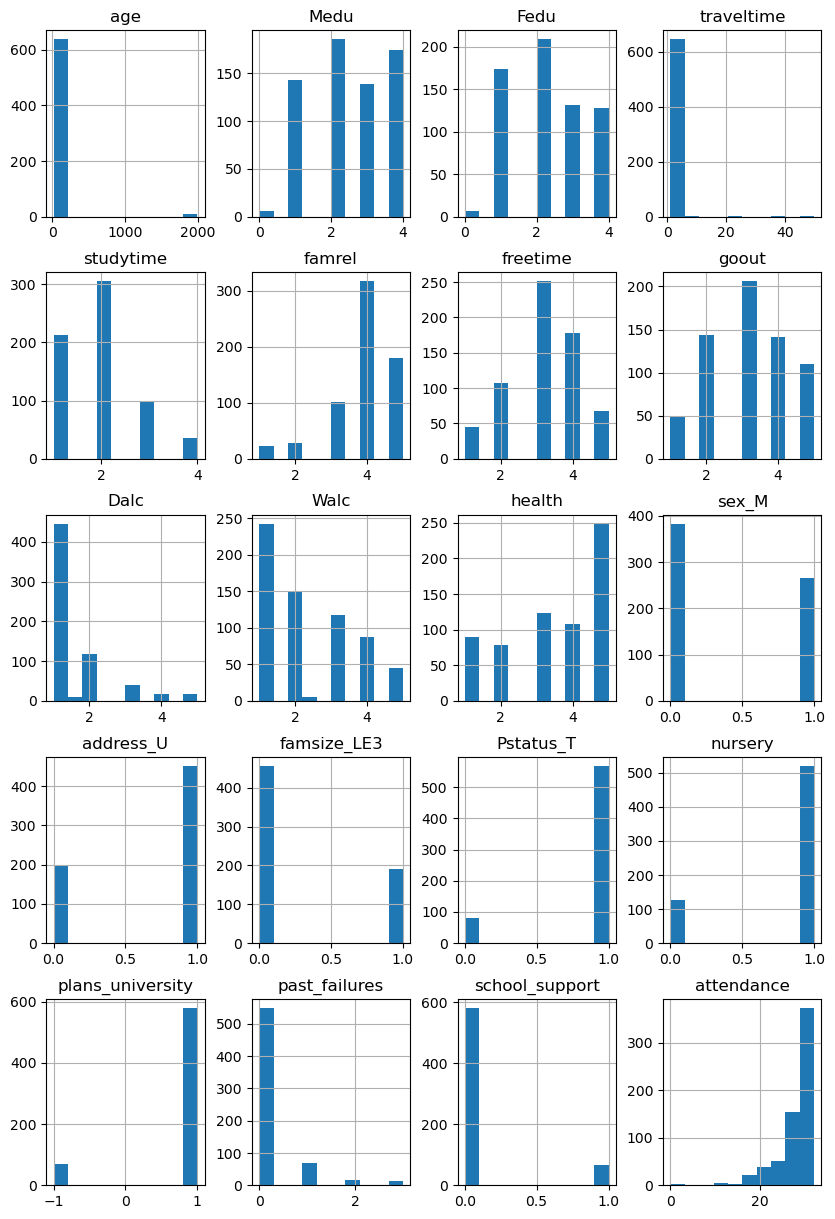

In [7]:
data.hist(figsize=(10, 15), column=data.columns)

data["age"] =  data["age"].mask(data["age"] > 1000, 2006 - data["age"])

for i in range(len(data["traveltime"])):
    if data.at[i, "traveltime"] > 4:
        if data.at[i, "traveltime"] < 15:
            data.at[i, "traveltime"] = 1
        elif data.at[i, "traveltime"] <= 30:
            data.at[i, "traveltime"] = 2
        elif data.at[i, "traveltime"] <= 60:
            data.at[i, "traveltime"] = 3
        else:
            data.at[i, "traveltime"] = 4

data.to_csv("ndata.csv", index=False)

norm_data2 = normalization(data)
norm_data2.to_csv("norm_data.csv", index=False)

cross_validation(norm_data2, scores)


__(1.5 балла)__

Другой простой способ найти выбросы &mdash; сделать предсказание и посчитать ошибку на каждом объекте по отдельности и посмотреть на объекты с наибольшей ошибкой. Обучите линейную регрессию (функция fit) и для каждого объекта посчитайте среднеквадратичное отклонение. Постройте гистограмму распределения ошибок. Посмотрите на гистограмму и удалите из выборки те объекты на которых ошибка слишком большая.

Обратите внимание, что просто удалять все объекты с высокой ошибкой нельзя &mdash; это, конечно, хороший способ добиться меньшей ошибки (на данной выборке), но одновременно вы ухудшите обобщающую способность алгоритма. Вместо этого вам нужно найти однозначно ошибочные записи и их исправить.

*Hint: возможно, все проблемы уже были найдены первым способом; для проверки &mdash; в сумме здесь нужно исправить 3 проблемы.*

Для поиска ошибки на одном отдельном обьекте придётся обучить линейную регрессию руками. Частичный пример, допишите код. Постройте гистограмму распределения ошибок

array([[<Axes: title={'center': '0'}>]], dtype=object)

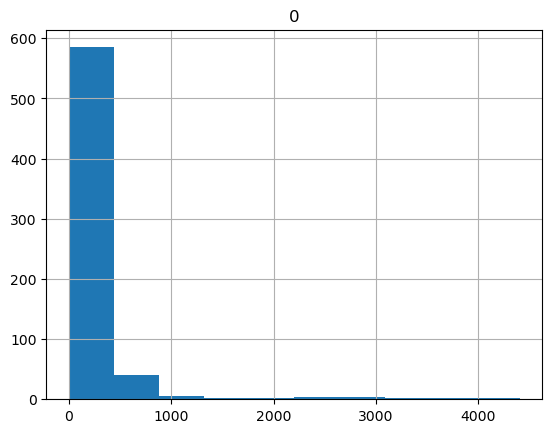

In [8]:
from sklearn import linear_model
regression = linear_model.LinearRegression().fit(norm_data2, scores)
prediction = regression.predict(norm_data2)
error = (prediction - scores) ** 2
error.hist()

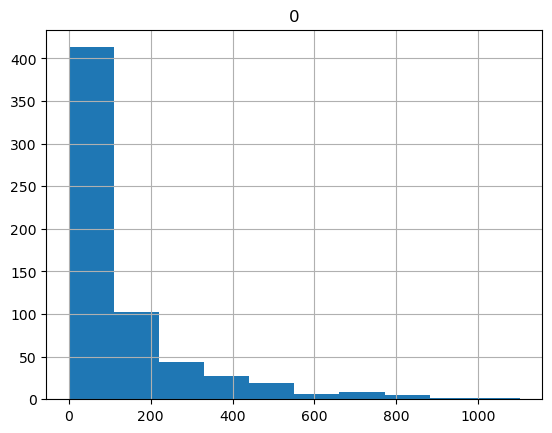

In [9]:
ind = error.loc[error[0]>1111]
error = error.drop(ind.index)
error.hist()
data = data.drop(ind.index)
new_scores = scores.drop(ind.index)

### Финальное предсказание и отчёт (1 балл)

Проведите предсказание еще раз и сравните качество с исходным. Запишите свои наблюдения - как изменялось качество обучения модели при использовании разных модификаций данных. 

In [10]:
norm_data2 = normalization(data)
print("Изначальное качество:")
cross_validation(norm_data1, scores)
print("Итоговое качество:")
cross_validation(norm_data2, new_scores)

Изначальное качество:
R² по фолдам: ['0.246', '0.323', '0.192', '0.197']
Средний R²: 0.240
Итоговое качество:
R² по фолдам: ['0.339', '0.294', '0.293', '0.324']
Средний R²: 0.313


# Отчёт
Качество предсказания, то есть величина $1 - \frac{D_{mod}}{D_{data}}$, где $D_{mod}$ - это средний квадрат ошибки предсказания, а $D_{data}$ - это дисперсия самих данных, после разъединения двух последних столбцов и нормализации равнялось 0.240. После добавления двух признаков в данные качество предсказания увеличилось до 0.248. Когда были исправлены выбросы, связанные с неправильным форатом данных качество предсказания увеличилось до 0.253. После удаления из данных людей, на которых модель выдавала отклонение, сильно большее, чем на остальных данных, качество предсказания увеличилось больше всего - до 0.313. Это произошло потому, что такие выбросы добавляют к среднему отклонению максимальное значение, а также не соотносятся с общей тенденцией, вследствие чего сдвигают предсказание в неверную сторону. Из всего этого можно сделать вывод о том, что исправление или удаление выбросов увеличивает качество предсказания. Также я понял, что добавление признаков, которые имеют отношение к задаче может улучшить качество предсказаний.